In [70]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

warnings.simplefilter("ignore")
plt.style.use("default")

# Numerical Integration

Some functions are difficult to integrate manually, or don't have a closed form solution in terms of elementary functions. We still want to find ways to construct approximate integrals. One method that may be familiar to most is Reimann sums.


## Riemann Sum
Given a function $f(x)$ in the interval $[a,b]$
- We can divide the interval into $n$ subintervals using $n+1$ partition points $a=x_0<x_1<...<x_n=b$.
- We may denote this partition as $P$ so that $P=\{a=x_0<x_1<...<x_n=b\}$.
- Let the length of each subinterval $i \in [1,n]$ be $\Delta x_i - x_{i-1}$.
- If the partition points are uniformly spaced, then $\Delta x_i=h=\frac{b-a}{n}$. This is refered to as the `uniform partition` $P_h$
- We can approximate the area of each subinterval using a rectange. The width is simply $\Delta x_i - x_{i-1}$ and the height is $f(\frac{x_{i-1} - x_{i}}{2})$ giving us an area of $f(\frac{x_{i-1} - x_{i}}{2})\Delta x$ for each subinterval.
- We can approximate the area of $f$ by computing the sum of the areas of those rectangles i.e $A \approx \sum_{i=1}^{n}f(\frac{x_{i-1} - x_{i}}{2})\Delta x$
- Notice as $max \ \Delta x \rightarrow 0$ the Riemann sum converges to $A$ exactly

This idea is illustrated in the Python plot below

### Visual Example of Riemann Sums

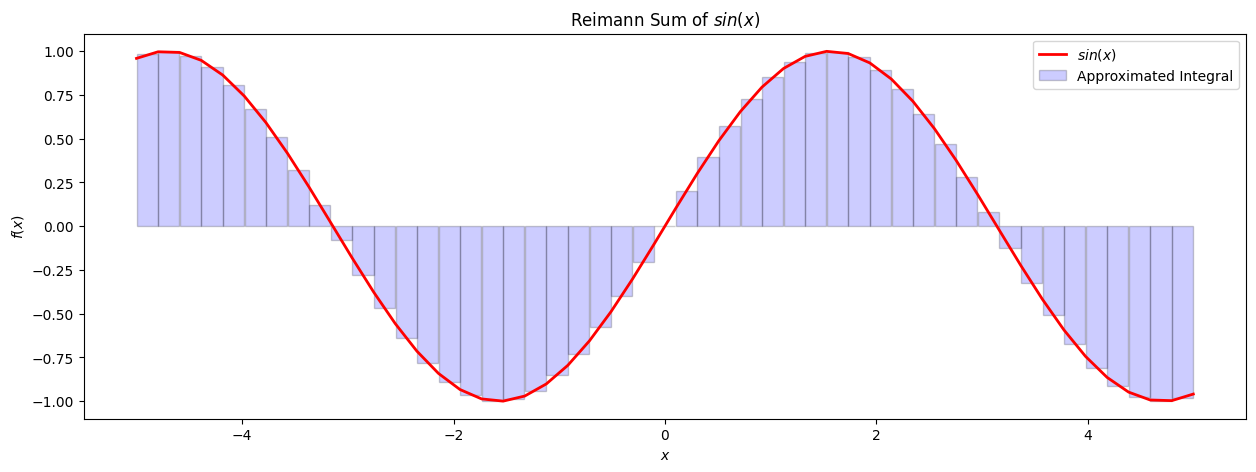

In [71]:
# f(x)
f = np.sin
x = np.linspace(start=-5, stop=5, num=50)
y = f(x)

# rectangles for riemann sum
midpoints = (x[1:] + x[:-1]) / 2
heights = f(midpoints)
bar_width = (x[-1] - x[0]) / len(x)

# plot
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x,y, color ='r', linewidth=2, label="$sin(x)$");
ax.bar(midpoints,heights,
        color='b',
        edgecolor='k',
        width=bar_width,
        alpha = 0.2,
        label="Approximated Integral"
        );
ax.set_xlabel("$x$");
ax.set_ylabel("$f(x)$");
ax.legend();
ax.set_title("Reimann Sum of $sin(x)$");

## Numerical Integration

A `definite integral` can be defined $ \int_{a}^{b} f(x)dx \equiv lim_{max \Delta x_i \rightarrow 0} \sum_{i=1}^{n}f(\frac{x_{i-1} - x_{i}}{2})\Delta x$
Defininte Integrals have the following properties:
- Linearity : $\int_{a}^{b}[\alpha f(X) + \beta g(x)]dx = \alpha \int_{a}^{b}f(x)dx + \beta \int_{a}^{b}g(x)dx $
- Additive : $\int_{a}^{b}f(x)dx = \int_{a}^{c}f(x)dx + \int_{c}^{b}f(x)dx $

If we want to approximate a definite integral $I(f)=\int_{a}^{b}=f(x)dx$ we can devise the following strategy:
- Divide the interval $[a,b]$ into $n$ subintervals giving us the partition $P=\{a=x_0<x_1<...<x_n=b\}$.
- Use the linearity property to express $I(f)$ as $\int_{a}^{b}f(x)dx=\sum_{i=1}^{n}\int_{x_i-1}^{x_i}f(x)dx$

This means the approximation $I(f)$ is the sum of $\int_{x_i -1}^{x_i} f(x)$ for $n$ subintervals $[x_{i-1} x_i]$ $i=1,2...n$

### Example Area Approximation

Lets approximate $f(x) = -x^2 + 3$ on the interval $[-1,1]$ using 100 evenly spaced points using the strategy outlined above:
- Interval $[-1,1]$ divided into 100 sub intervals gives the partition $P=\{a=-1<-0.979798<-0.959596<...<x_n=1\}$.
- Sum each subinterval using the python script below

Notice: The approximation is relatively close to our true solution 5.333333

In [72]:
f = lambda x: -x**2 + 3

x = np.linspace(-1 ,1, 100)
y = f(x)

midpoints = (x[1:] + x[:-1]) / 2
heights = f(midpoints)
partition_width = (x[-1] - x[0]) / len(x)

# approximate area
approximate_area = np.sum(heights * partition_width)

print(f"Approximated Area: {approximate_area}")

Approximated Area: 5.28006734006734


## Newton - Cotes Quadrature

Suppose we want to evaluate the integral $I(f) \equiv \int_{a}^{b} f(x) dx$ for some function $f(x)$ that doesn't have a closed form solution. How can we proceed?

We can approximate $f(x)$ using a polynomial interpolant  $p_n$ and evaluate $Q_n(f) \equiv \int_{a}^{b} p_n(x) dx$ because the integration of a polynomial can be carried out in closed form.

We call $Q_n(f)$ a `quadrature formula`, and we should have $Q_n(f) \approx I(f)$

A quadrature rule based on an interpolant $p_n$ at $n+1$ ***equally spaced points*** in $[a,b]$ is known as `Newton-Cotes` formula of order $n$

 Suppose we have $n + 1$ equally spaced points in $[a,b]$
 Let $x_k = a +kh,\ k=0,1,...,n \text{ where } h=\frac{(b-a)}{n}$  

 We can write the interpolant of $f$ in Lagrange form as
 $p_n(x)=\sum_{k=0}^{n}f(x_k)L_k(x), \text{ where }  \text{ where } L_k(x) \equiv \prod_{i=0, i\neq k}^{n} \frac{x-x_i}{x_k-x_i}$

Then
$Q_n(f) = \int_{a}^{b}p_n(x)dx = \int_{a}^{b}\sum_{k=0}^{n}f(x_k)L_k(x)dx = \sum_{k=0}^{n}f(x_k)\int_{a}^{b}L_k(x)dx=\sum_{k=0}^{n}w_kf(x_k) $
where $w_k \equiv \int_{a}^{b}L_k(x)dx \in R$ is the $k^{th}$ quadrature weight

**IMPORTANT**
Notice that the weights $w_k$ are not dependent upon $f$. Instead, they are dependent on $x$. Thus, for a given set of points $x$, we can precompute and store the quadrature weights to be used for various functions $f$.



## Basic Quadrature Rules
Depending on what interpolation nodes we select, different basic quadrature rules are derived


## Basic Midpoint Rule
- Integrate $[\alpha , \beta]$ using only a single node $\frac{\alpha + \beta}{2}$(the midpoint)
- Thus $\int_{\alpha}^{\beta}f(x)\approx(\beta-\alpha)f(\frac{\alpha+\beta}{2})$


## Composite Midpoint Rule
- Use the partition $P=\{a=x_0<x_1<...<x_n=b\}$
- Thus $\int_{a}^{b}f(x)dx\approx\sum_{i=1}^{n}(x_{i}-x_{i-1})f((x_{i}-x_{i-1}))$

(14.0, 16.0)

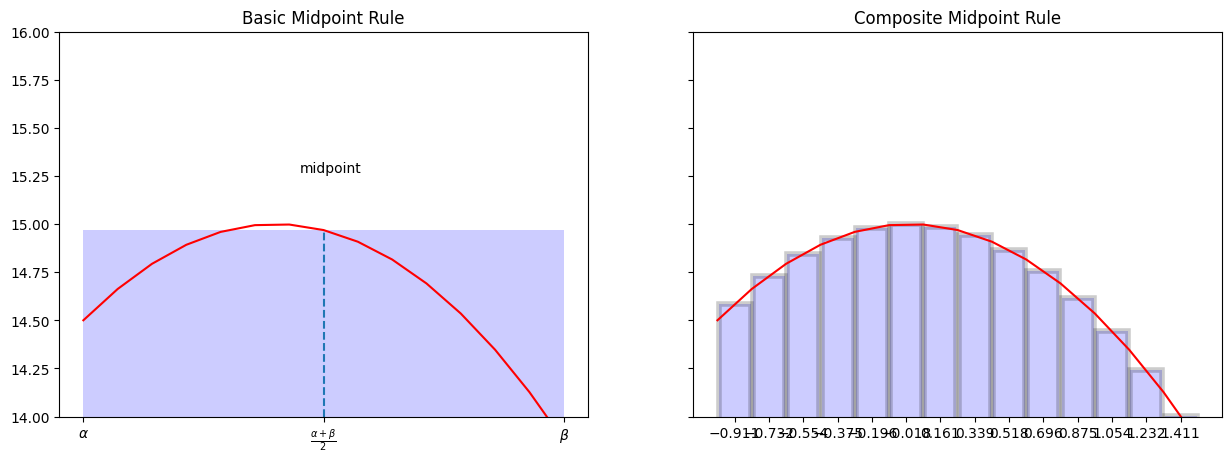

In [73]:
# for example, consider this funtion and given interval
f = lambda x : -.5*x**2 + 15
alpha = -1
beta = 1.5
x = np.linspace(start = alpha , stop=beta, num=15)
y = f(x)

# for basic midpoint rule
midpoint = (alpha + beta) /2
width = (beta-alpha)

# for composite midpoint rule
partitions = (x[1:] + x[:-1]) / 2
partition_widths = (x[-1] - x[0]) / len(x)


# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True);

# basic midpoint rule
ax1.plot(x,y, color='r');
ax1.bar(midpoint, f(midpoint), width = width, alpha = 0.2, color='b');
ax1.axvline(midpoint, linestyle="--", ymax=.48);
ax1.annotate("midpoint", xy=(midpoint, f(midpoint)), xytext= (midpoint*.5, f(midpoint)*1.02));
ax1.set_xticks([alpha,midpoint,beta]);
ax1.set_title("Basic Midpoint Rule");
ax1.set_xticklabels([r"$\alpha$", r"$\frac{\alpha + \beta}{2}$", r"$\beta$"]);

# composite midpoint rule
ax2.plot(x,y, color='r');
ax2.bar(partitions, f(partitions),width=partition_widths, edgecolor='k', alpha=0.2, color='blue', linewidth=4);
ax2.set_xticks(partitions);
ax2.set_title("Composite Midpoint Rule");

ax1.set_ylim(14,16)

## Basic Trapezoidal Rule
- Integrate $[\alpha , \beta]$ using two nodes $\alpha$ and $\beta$(the endpoints)
- Thus $\int_{\alpha}^{\beta}f(x)\approx\frac{\beta-\alpha}{2}[f(\alpha)+f(\beta)]$


## Composite Trapezoidal Rule
- Use the partition $P=\{a=x_0<x_1<...<x_n=b\}$
- Thus $\int_{a}^{b}f(x)dx=\sum_{i=1}^{n}\frac{x_i-x_{i-1}}{2} [f(x_{i-1}) + f(x_i)]$

(11.0, 16.0)

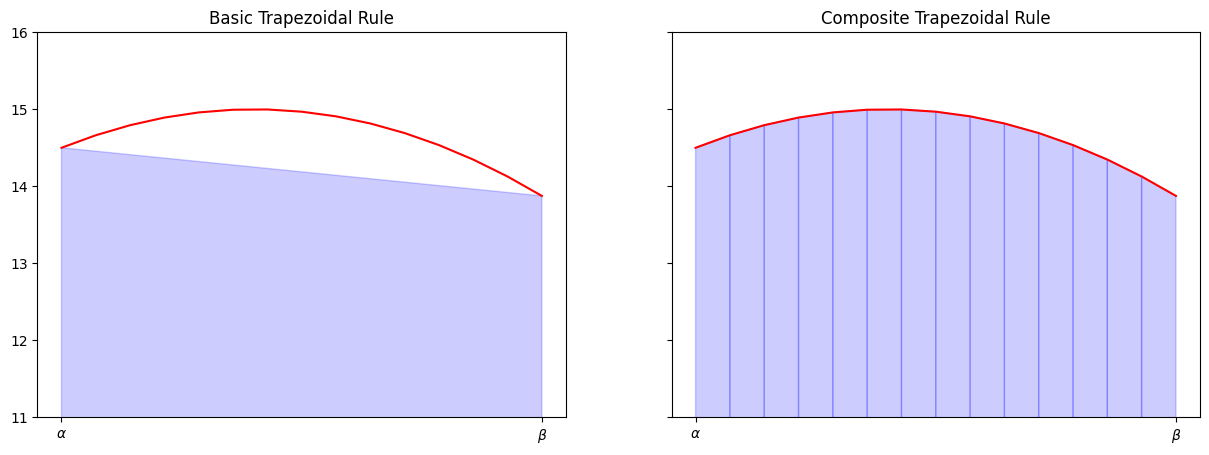

In [74]:
# for example, consider this funciton and given interval
f = lambda x : -.5*x**2 + 15
alpha = -1
beta = 1.5
x = np.linspace(start = alpha, stop=beta, num=15)
y = f(x)


# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True);

# basic trapezoidal rule
ax1.plot(x,y, color='r');
trapezoid = list(zip([alpha,alpha,beta,beta],[0,f(alpha),f(beta),0]))
ax1.add_patch(patches.Polygon(xy=trapezoid, fill=True, alpha=0.2,color='b'))
ax1.set_xticks([alpha,beta]);
ax1.set_title("Basic Trapezoidal Rule");
ax1.set_xticklabels([r"$\alpha$", r"$\beta$"]);

# composite trapezoidal rule
ax2.plot(x,y, color='r');
for position, point in enumerate(x[:-1]):
        next_point = x[position +1]
        trapezoid_coordinates = list(zip([point,point,next_point,next_point],[0,f(point),f(next_point),0]))
        ax2.add_patch(patches.Polygon(xy= trapezoid_coordinates,
                                      fill=True,
                                      alpha=0.2,
                                      edgecolor="k",
                                      color='b'
                                      )
                      )

ax2.set_title("Composite Trapezoidal Rule");
ax2.set_xticks([alpha,beta]);
ax2.set_xticklabels([r"$\alpha$", r"$\beta$"]);

ax1.set_ylim(11,16)


## Basic Simpson Rule
- Integrate $[\alpha , \beta]$ using thee nodes $\alpha, \frac{\alpha + \beta}{2} \text{ and } \beta$ (the midpoint and endpoints)
- Thus $\int_{\alpha}^{\beta}f(x)\approx\frac{\beta-\alpha}{6}[f(\alpha)+ 4f(\frac{\alpha+\beta}{2})+f(\beta)]$


## Composite Simpson Rule
- Use the partition $P=\{a=x_0<x_1<...<x_n=b\}$
- Thus $\int_{a}^{b}f(x)dx=\sum_{i=1}^{n}\frac{x_i-x_{i-1}}{6}[f(x_{i-1})+ 4f(\frac{x_{i-1}+x_i}{2})+f(x_i)]$

(11.0, 16.0)

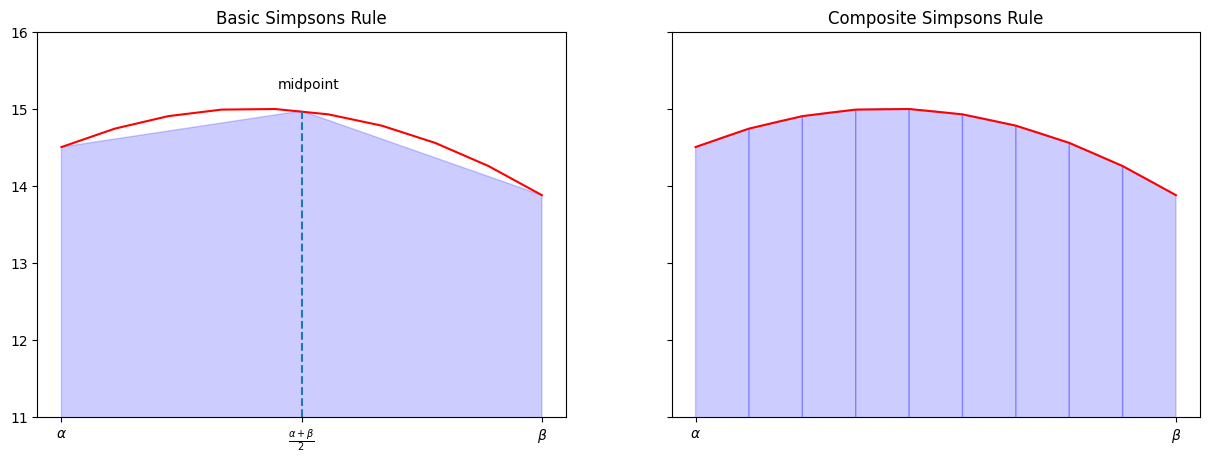

In [75]:
# for example, consider this funciton and given interval
f = lambda x : -.5*x**2 + 15
alpha = -1
beta = 1.5
midpoint = (alpha + beta) / 2
x = np.linspace(start = alpha , stop=beta, num=10)
y = f(x)


# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True);

# basic trapezoidal rule
ax1.plot(x,y, color='r');
polygon = list(zip([alpha,alpha,midpoint, beta,beta],[0,f(alpha),f(midpoint),f(beta),0]))
ax1.add_patch(patches.Polygon(xy=polygon, fill=True, alpha=0.2,color='b'))
ax1.axvline(midpoint, linestyle="--", ymax=.8);
ax1.annotate("midpoint", xy=(midpoint, f(midpoint)), xytext= (midpoint*.5, f(midpoint)*1.02));
ax1.set_title("Basic Simpsons Rule");
ax1.set_xticks([alpha,midpoint,beta]);
ax1.set_xticklabels([r"$\alpha$", r"$\frac{\alpha + \beta}{2}$", r"$\beta$"]);

# composite trapezoidal rule
(x[1:] + x[:-1]) / 2
ax2.plot(x,y, color='r');
for position, point in enumerate(x[:-1]):
    next_point = x[position +1]
    midpoint = (point + next_point) / 2
    trapezoid_coordinates = list(zip([point,point,midpoint,next_point,next_point],[0,f(point),f(midpoint),f(next_point),0]))
    ax2.add_patch(patches.Polygon(xy= trapezoid_coordinates,
                                  fill=True,
                                  alpha=0.2,
                                  edgecolor="k",
                                  color='b'
                                  )
                  )

ax2.set_title("Composite Simpsons Rule");
ax2.set_xticks([alpha,beta]);
ax2.set_xticklabels([r"$\alpha$", r"$\beta$"]);

ax1.set_ylim(11,16)


## Error Estimates
Let $E_n(f)$ denote the error of our integral approximation
Then $E_n(f) \equiv I(f)-Q_n(f) = \int_{a}^{b}f(x)dx - \int_{a}^{b}p_n(x)dx = \int_{a}^{b}[f(x)dx - p_n(x)]dx$

We already know how to compute $f(x) - p(x)$ *(see [here](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error) if unfamiliar with interpolation error)*

Recall:
$f(x) - p(x) = \frac{f^{n+1}(\theta)}{(n+1)!} (x-x_0)...(x-x_n)$

Hence, the upper error bound can be expressed:
$|E_n(f)| \leq \frac{M_{n+1}}{(n+1)!} \int_{a}^{b} |(x-x_0)(x-x_1)...(x-x_n)|dx$ where $M_{n+1} = max_{\theta \in [a,b]} |f^{n+1}(\theta)|$

**NOTICE** The error bound will be exact if $f$ is a polynomial of degree $n$
**NOTICE** A convenient way to compare accuracy of quadrature rules is to compare the polynomial degree they integrate exactly.
**NOTICE** Newton-Cotes formulae are base on interpolation at equally spaced points, so they are susceptible to [Runge's phenonenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) and we expect them to be inaccurate for large $n$